In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Analyse the Physionet data of sleep apnea

The data was obtained from https://physionet.org/content/apnea-ecg/1.0.0/. It contains the data of 70 patients including their continuous digitized ECG signals, a set of apnea annotations (derived by human experts on the basis of simultaneously recorded respiration and related signals), and a set of machine-generated QRS annotations. A text file containing additional information on the patients' age, height, sex, etc., were also profvided. We combine the features extracted from the records with the additional information to crate the full database.

In [25]:
# Loading file containing additional information
info= pd.read_csv(r'C:\Users\bccpe\Documents\annotations apnea-ecg dataset.csv')

In [3]:
info.head()

,Record,Length MInutes,Non-apnminutes,apnea minutes,hours w/ apnea,AI,HI,AHI,Age,Sex,height(cm),weight(kg)
0,a01,490,20,470,9,12.5,57.1,69.6,51,M,175,102
1,a02,529,109,420,9,57.2,12.3,69.5,38,M,180,120
2,a03,520,274,246,9,38.4,0.7,39.1,54,M,168,80
3,a04,493,40,453,9,73.4,4.0,77.4,52,M,173,121
4,a05,455,179,276,8,35.0,6.0,41.0,58,M,176,78


In [4]:
info.shape

(70, 12)

First, we will have to define our target variable, and that is whether the patient has apnea or not. According to https://www.resmed.co.in/blogs/apnea-hypopnea-index, sleep apnea is classified using AHI index. It is classsified as follows:
* None/Minimal sleep: AHI < 5 per hour
* Mild sleep: AHI ≥ 5, but < 15 per hour
* Moderate sleep: AHI ≥ 15, but < 30 per hour
* Severe sleep: AHI ≥ 30 per hour

For analysis purposes we will consider three categories

In [26]:
conditions = [
    (info['AHI'] < 5),
    (info['AHI'] >= 5) & (info['AHI'] <30),
    (info['AHI'] >= 30),
    ]

In [56]:
values=['0','1','2']
info['Apnea_level'] = np.select(conditions, values)
info['Apnea_level'] = info['Apnea_level'].astype(int)

info.head()

,Record,Length MInutes,Non-apnminutes,apnea minutes,hours w/ apnea,AI,HI,AHI,Age,Sex,height(cm),weight(kg),Apnea_level
0,a01,490,20,470,9,12.5,57.1,69.6,51,0,175,102,2
1,a02,529,109,420,9,57.2,12.3,69.5,38,0,180,120,2
2,a03,520,274,246,9,38.4,0.7,39.1,54,0,168,80,2
3,a04,493,40,453,9,73.4,4.0,77.4,52,0,173,121,2
4,a05,455,179,276,8,35.0,6.0,41.0,58,0,176,78,2


In [54]:
# converting categorical data into a numerical type to make it ready for analysis 
info['Sex']=info['Sex'].replace({'M': 0,'F': 1})

Now we can combine both datasets

In [22]:
extracted_features= pd.read_csv('extracted_features.csv')
extracted_features.head()

,Unnamed: 0,AVNN,HR,SDNN,pNN50,RMSSD,HRdiff,VLF,LF,HF,LHFratio,Record
0,0,831.513761,73.040629,90.699505,47.245409,43.322470,45.454545,1.253066e+03,1.672205e+03,6.630697e+02,2.521914,a01
1,1,755.933485,84.557358,64.424733,9.077156,37.133484,5941.747573,9.715965e+02,7.729338e+02,4.106547e+02,1.882199,a02
2,2,17441.346154,63.094282,101765.236602,57.281553,84112.241637,272.657110,4.589937e+08,7.046431e+07,6.001843e+06,11.740446,a03
3,3,729.207451,82.827238,48.530037,3.581871,27.266419,163.353500,4.430518e+02,2.851670e+02,2.091080e+02,1.363731,a04
4,4,990.203373,60.887498,67.965054,46.176763,36.608316,36.304962,1.592097e+03,1.088706e+03,3.806619e+02,2.860034,a05


In [23]:
extracted_features=extracted_features.drop(extracted_features.columns[0],axis=1)

In [24]:
extracted_features

,AVNN,HR,SDNN,pNN50,RMSSD,HRdiff,VLF,LF,HF,LHFratio,Record
0,831.513761,73.040629,90.699505,47.245409,43.322470,45.454545,1.253066e+03,1.672205e+03,6.630697e+02,2.521914,a01
1,755.933485,84.557358,64.424733,9.077156,37.133484,5941.747573,9.715965e+02,7.729338e+02,4.106547e+02,1.882199,a02
2,17441.346154,63.094282,101765.236602,57.281553,84112.241637,272.657110,4.589937e+08,7.046431e+07,6.001843e+06,11.740446,a03
3,729.207451,82.827238,48.530037,3.581871,27.266419,163.353500,4.430518e+02,2.851670e+02,2.091080e+02,1.363731,a04
4,990.203373,60.887498,67.965054,46.176763,36.608316,36.304962,1.592097e+03,1.088706e+03,3.806619e+02,2.860034,a05
...,...,...,...,...,...,...,...,...,...,...,...
65,991.212425,62.126889,148.427508,64.994985,67.483049,81.834532,3.483876e+03,2.125542e+03,1.022782e+03,2.078198,x31
66,1005.529768,60.645305,116.552528,76.969697,78.971930,124.553571,2.053907e+03,2.224366e+03,1.660136e+03,1.339870,x32
67,714.964209,85.708406,81.202893,34.455587,45.767492,291.085506,7.587059e+02,1.497610e+03,9.358604e+02,1.600249,x33
68,714.871060,85.805574,83.695243,35.340502,48.109791,291.716687,9.836190e+02,1.699065e+03,1.007047e+03,1.687175,x34


In [57]:
df=pd.merge(info,extracted_features,on='Record')


In [59]:
df

,Record,Length MInutes,Non-apnminutes,apnea minutes,hours w/ apnea,AI,HI,AHI,Age,Sex,...,AVNN,HR,SDNN,pNN50,RMSSD,HRdiff,VLF,LF,HF,LHFratio
0,a01,490,20,470,9,12.50,57.1,69.60,51,0,...,831.513761,73.040629,90.699505,47.245409,43.322470,45.454545,1.253066e+03,1.672205e+03,6.630697e+02,2.521914
1,a02,529,109,420,9,57.20,12.3,69.50,38,0,...,755.933485,84.557358,64.424733,9.077156,37.133484,5941.747573,9.715965e+02,7.729338e+02,4.106547e+02,1.882199
2,a03,520,274,246,9,38.40,0.7,39.10,54,0,...,17441.346154,63.094282,101765.236602,57.281553,84112.241637,272.657110,4.589937e+08,7.046431e+07,6.001843e+06,11.740446
3,a04,493,40,453,9,73.40,4.0,77.40,52,0,...,729.207451,82.827238,48.530037,3.581871,27.266419,163.353500,4.430518e+02,2.851670e+02,2.091080e+02,1.363731
4,a05,455,179,276,8,35.00,6.0,41.00,58,0,...,990.203373,60.887498,67.965054,46.176763,36.608316,36.304962,1.592097e+03,1.088706e+03,3.806619e+02,2.860034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,x31,558,42,516,10,86.80,6.7,93.50,29,1,...,991.212425,62.126889,148.427508,64.994985,67.483049,81.834532,3.483876e+03,2.125542e+03,1.022782e+03,2.078198
66,x32,539,114,425,9,63.30,8.5,71.80,29,1,...,1005.529768,60.645305,116.552528,76.969697,78.971930,124.553571,2.053907e+03,2.224366e+03,1.660136e+03,1.339870
67,x33,474,471,3,0,0.13,0.0,0.13,28,1,...,714.964209,85.708406,81.202893,34.455587,45.767492,291.085506,7.587059e+02,1.497610e+03,9.358604e+02,1.600249
68,x34,476,472,4,0,0.38,0.0,0.38,30,1,...,714.871060,85.805574,83.695243,35.340502,48.109791,291.716687,9.836190e+02,1.699065e+03,1.007047e+03,1.687175


# 1. Exploratory Data Analysis

### Visualisation of the relationship of different variables with Apnea level and AHI

a) Relationship with Weight

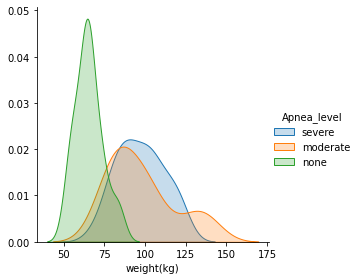

In [9]:
sns.FacetGrid(df, hue='Apnea_level',height=4).map(sns.kdeplot, 'weight(kg)', shade=True).add_legend()

<AxesSubplot:xlabel='weight(kg)', ylabel='AHI'>

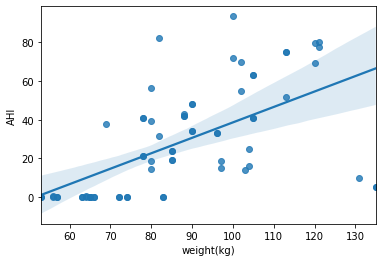

In [18]:
sns.regplot(data=df, x='weight(kg)', y='AHI')

The general trend shows that those with a lower weight tend to have minimal or no apnea

b) Relationship with Age

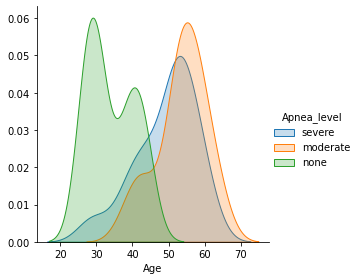

In [11]:
sns.FacetGrid(df, hue='Apnea_level',height=4).map(sns.kdeplot, 'Age', shade=True).add_legend()

<AxesSubplot:xlabel='Age', ylabel='AHI'>

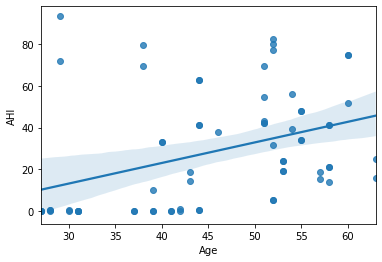

In [19]:
sns.regplot(data=df, x='Age', y='AHI')

The general trend shows that younger tend to have minimal or no apnea. However, there are many exceptions and outliers

c) Realtionship with sex (Male is 0 and Female is 1)

<AxesSubplot:xlabel='Sex', ylabel='count'>

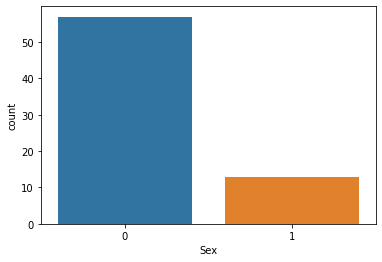

In [15]:
sns.countplot(x='Sex',data=df)

<AxesSubplot:xlabel='Apnea_level', ylabel='count'>

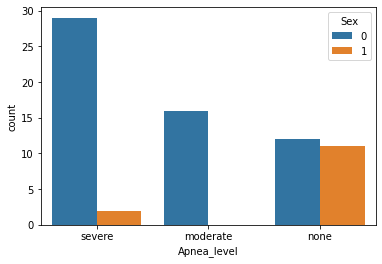

In [14]:
sns.countplot(x='Apnea_level', hue='Sex',data=df)

<AxesSubplot:xlabel='Sex', ylabel='AHI'>

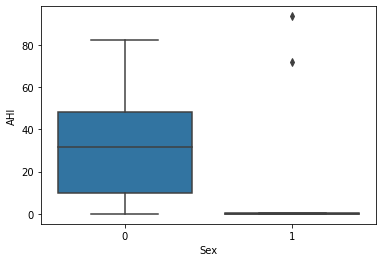

In [70]:
sns.boxplot(x='Sex',y='AHI',data=df)

It seems that men are much more likely to have severe and moderate sleep apnea than women. However, the samples is highly skewed and represent more men than women.It contains outliers as well. Thus, more information will have to be collected before a definitive conclusion can be made.

d) Relationship with ecg quantities

In [89]:
ecg_quantities=df.columns[13:]
ecg_quantities

Index(['AVNN', 'HR', 'SDNN', 'pNN50', 'RMSSD', 'HRdiff', 'VLF', 'LF', 'HF',
       'LHFratio'],
      dtype='object')

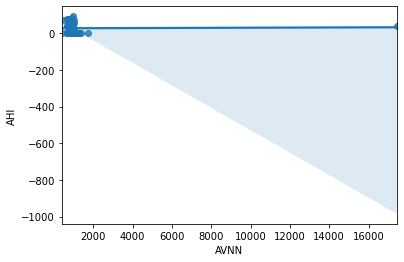

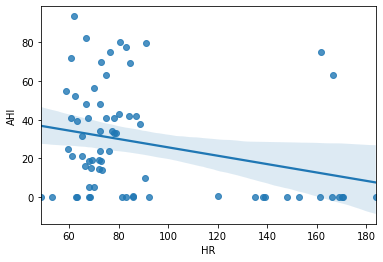

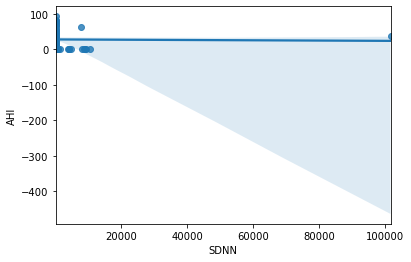

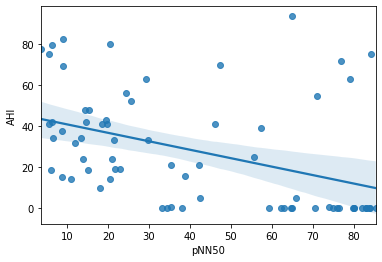

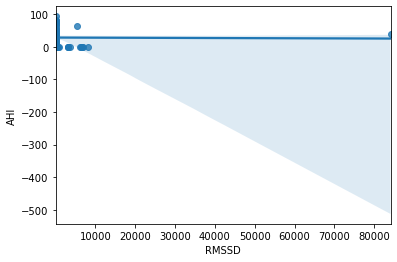

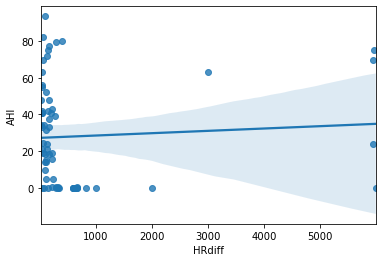

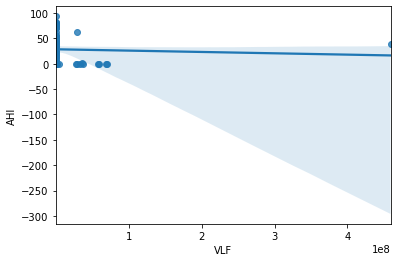

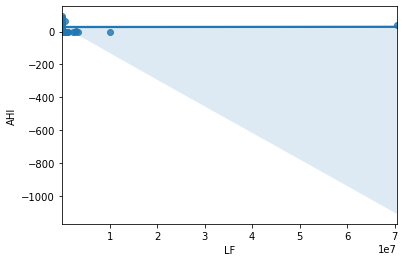

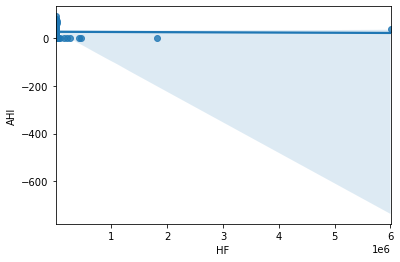

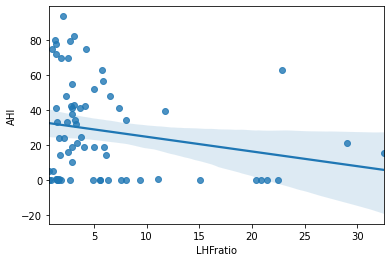

In [105]:
for i,col in enumerate(ecg_quantities):
    plt.figure(i)
    sns.regplot(data=df, x=col, y='AHI')
    
    

Only pNN50 shows a definite correaltion. HR and LHFratio seem weakly related.

### Univariate analysis



array([[<AxesSubplot:title={'center':'Length MInutes'}>,
        <AxesSubplot:title={'center':'Non-apnminutes'}>,
        <AxesSubplot:title={'center':'apnea minutes'}>,
        <AxesSubplot:title={'center':'hours w/ apnea'}>,
        <AxesSubplot:title={'center':'AI'}>],
       [<AxesSubplot:title={'center':'HI'}>,
        <AxesSubplot:title={'center':'AHI'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Sex'}>,
        <AxesSubplot:title={'center':'height(cm)'}>],
       [<AxesSubplot:title={'center':'weight(kg)'}>,
        <AxesSubplot:title={'center':'AVNN'}>,
        <AxesSubplot:title={'center':'HR'}>,
        <AxesSubplot:title={'center':'SDNN'}>,
        <AxesSubplot:title={'center':'pNN50'}>],
       [<AxesSubplot:title={'center':'RMSSD'}>,
        <AxesSubplot:title={'center':'HRdiff'}>,
        <AxesSubplot:title={'center':'VLF'}>,
        <AxesSubplot:title={'center':'LF'}>,
        <AxesSubplot:title={'center':'HF'}>],
       [<AxesSu

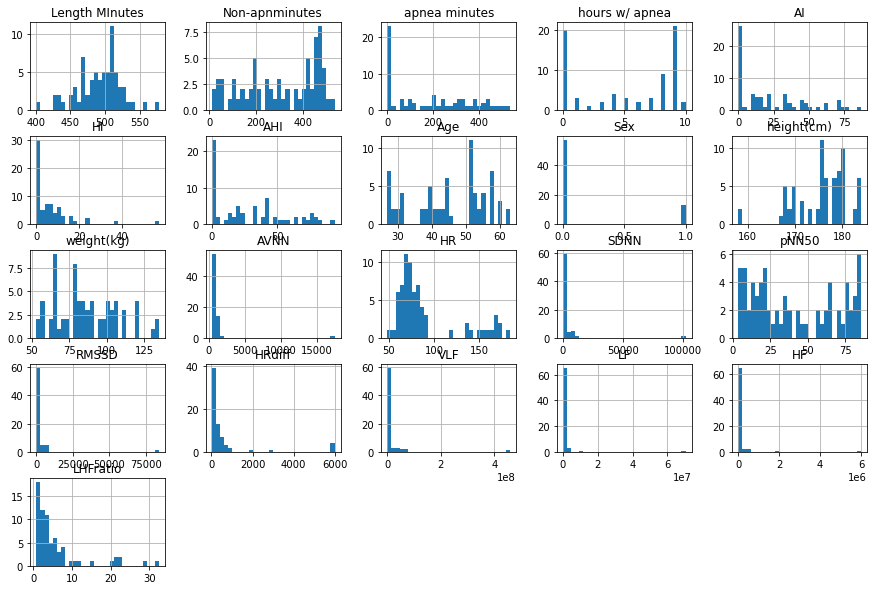

In [43]:
df.hist(bins=30, figsize=(15, 10))

###  Multivariate analysis

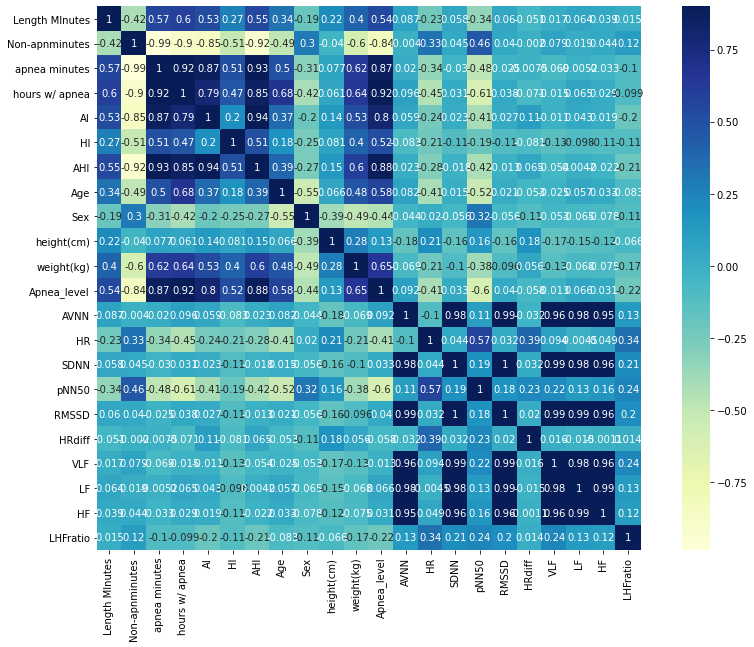

In [61]:
corr_matrix=df.corr()
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corr_matrix, vmax=.9, square=True,cmap="YlGnBu",annot=True);

There are many independent variables that are highly correlated

In [62]:
corr_matrix['Apnea_level'].sort_values(ascending=False)

Apnea_level       1.000000
hours w/ apnea    0.920685
AHI               0.879667
apnea minutes     0.866425
AI                0.800584
weight(kg)        0.649539
Age               0.579117
Length MInutes    0.541776
HI                0.523077
height(cm)        0.130841
AVNN              0.092119
LF                0.065649
RMSSD             0.039762
SDNN              0.033201
HF                0.030956
VLF              -0.012535
HRdiff           -0.058259
LHFratio         -0.215834
HR               -0.414188
Sex              -0.442333
pNN50            -0.604542
Non-apnminutes   -0.844063
Name: Apnea_level, dtype: float64

hours w/ apnea, AHI, apnea minutes, and AI all have a strong correlation with Apnea since they are used in calculating it. Weight and age have a stong correlation while most of the ecg features have weak correlations. pNN50 has a stong negative correaltion.

# 2. Statistical Analysis

### 2a Descriptive Statistics

In [40]:
df.describe()

,Length MInutes,Non-apnminutes,apnea minutes,hours w/ apnea,AI,HI,AHI,Age,Sex,height(cm),...,AVNN,HR,SDNN,pNN50,RMSSD,HRdiff,VLF,LF,HF,LHFratio
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,...,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,7.000000e+01,7.000000e+01,7.000000e+01,70.000000
mean,491.828571,305.171429,186.657143,5.085714,21.858000,6.189571,28.047571,45.142857,0.185714,175.842857,...,1112.843461,89.173347,2561.628698,41.034265,2016.656521,627.013495,1.305805e+07,1.394939e+06,1.375869e+05,5.876027
std,31.576441,156.571692,172.275385,3.899992,24.101227,9.423092,27.537779,10.837784,0.391684,5.588901,...,1989.434140,35.563418,12302.066210,28.157535,10144.068102,1397.351127,5.667591e+07,8.485235e+06,7.470222e+05,6.887400
min,401.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.000000,0.000000,158.000000,...,415.305247,48.668867,32.960686,3.581871,13.125471,16.923077,2.197134e+02,2.357354e+02,3.274369e+01,0.752200
25%,470.250000,180.750000,3.250000,0.000000,0.030000,0.000000,0.130000,38.000000,0.000000,171.500000,...,761.663264,67.825506,55.284310,15.237926,27.803312,78.693927,8.508478e+02,7.177194e+02,2.308896e+02,1.790099
50%,496.000000,320.500000,178.000000,6.500000,14.200000,3.500000,21.000000,44.000000,0.000000,177.000000,...,845.955662,74.833569,87.815899,34.891345,49.920098,159.562632,1.545828e+03,1.685635e+03,8.537680e+02,3.062892
75%,511.000000,453.250000,323.500000,9.000000,34.750000,8.900000,42.750000,53.750000,0.000000,179.750000,...,965.629182,88.230557,180.253282,69.364845,105.308763,542.916781,6.164228e+03,8.043303e+03,3.236305e+03,6.071564
max,578.000000,535.000000,534.000000,10.000000,86.800000,57.100000,93.500000,63.000000,1.000000,184.000000,...,17441.346154,183.813548,101765.236602,85.373781,84112.241637,5999.716727,4.589937e+08,7.046431e+07,6.001843e+06,32.557475


### 2b Inferential Statistics

The only features whose distributions approximate a normal distibution are length minutes and height. However, it is nonsenical to perform analysis with length minutes as it simply states the minutes recorded and will not have any effect on our target variable. Thus, we will perform t-test on only height. Mann Whitney U test will be used for other varibales since they are not normally distributed.

In [102]:
from scipy.stats import ttest_ind, mannwhitneyu

In [87]:
healthy = df[(df['Apnea_level'] == 0)]
sick = df[(df['Apnea_level'] >0)]



In [88]:
ttest_ind(healthy['height(cm)'],severe['height(cm)'])

Ttest_indResult(statistic=-0.9840328605114579, pvalue=0.3296559126747505)

The p value is 0.33 which indicates that height may not be statistically significant

In [98]:
columns=list(df.columns)
columns.remove('height(cm)')

In [103]:
for column in columns:
    print(mannwhitneyu(healthy[column], sick[column], alternative='two-sided'))

MannwhitneyuResult(statistic=684.0, pvalue=0.07376463365883973)
MannwhitneyuResult(statistic=152.5, pvalue=1.2470547750998978e-06)
MannwhitneyuResult(statistic=1052.5, pvalue=1.592513984923112e-10)
MannwhitneyuResult(statistic=1.0, pvalue=1.517627821031479e-11)
MannwhitneyuResult(statistic=2.0, pvalue=4.781287320859543e-12)
MannwhitneyuResult(statistic=0.0, pvalue=9.66105271544962e-12)
MannwhitneyuResult(statistic=51.0, pvalue=3.8481950770449575e-10)
MannwhitneyuResult(statistic=0.0, pvalue=1.0307301177640556e-11)
MannwhitneyuResult(statistic=75.0, pvalue=5.774011730798724e-09)
MannwhitneyuResult(statistic=776.0, pvalue=1.2879136388706747e-05)
MannwhitneyuResult(statistic=26.0, pvalue=1.2555920468714375e-10)
MannwhitneyuResult(statistic=0.0, pvalue=3.98258029655069e-13)
MannwhitneyuResult(statistic=632.0, pvalue=0.25517767321655005)
MannwhitneyuResult(statistic=800.0, pvalue=0.0012014599849489798)
MannwhitneyuResult(statistic=967.0, pvalue=1.0001339683982572e-07)
MannwhitneyuResult(sta